In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import seaborn as sns


# -- 1. Reading the .csv dataset --

In [ ]:
df = pd.read_csv('global_beverage_survey.csv')
print(df.to_string(index=False, line_width=100000))

 Country        Region Preferred Beverage  Consumption Rate  Primary Type
      UK        Europe                Tea               3.5     Black Tea
     USA North America             Coffee               2.8 Filter Coffee
  Brazil South America             Coffee               4.2 Filter Coffee
   Japan          Asia                Tea               3.1     Green Tea
 Germany        Europe             Coffee               3.8 Filter Coffee
   China          Asia                Tea               4.0     Green Tea
   Kenya        Africa                Tea               2.5     Black Tea
  Mexico North America             Coffee               2.1 Filter Coffee
   India          Asia                Tea               3.3     Black Tea
Colombia South America             Coffee               4.5      Espresso
   Italy        Europe             Coffee               3.0      Espresso
Ethiopia        Africa             Coffee               3.2 Filter Coffee
  Canada North America             Cof

# --- 2. DESCRIPTIVE ANALYSIS ---


In [4]:
print("--- Descriptive Statistics of the Dataset ---")
print(df.describe(include='all'))

--- Descriptive Statistics of the Dataset ---
       Country  Region Preferred Beverage  Consumption Rate   Primary Type
count       15      15                 15         15.000000             15
unique      15       5                  2               NaN              4
top         UK  Europe             Coffee               NaN  Filter Coffee
freq         1       4                  9               NaN              7
mean       NaN     NaN                NaN          3.146667            NaN
std        NaN     NaN                NaN          0.748204            NaN
min        NaN     NaN                NaN          2.000000            NaN
25%        NaN     NaN                NaN          2.600000            NaN
50%        NaN     NaN                NaN          3.100000            NaN
75%        NaN     NaN                NaN          3.650000            NaN
max        NaN     NaN                NaN          4.500000            NaN


# --- 3. BOX PLOT (Consumption Rate by Region) ---


<Axes: xlabel='Region', ylabel='Consumption Rate'>

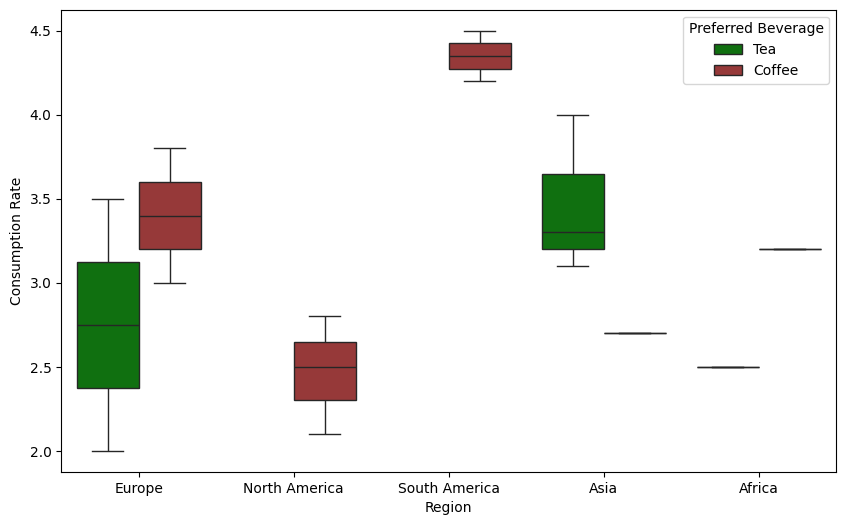

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Region', y='Consumption Rate', data=df,
hue='Preferred Beverage',  
palette={'Coffee': 'brown', 'Tea': 'green'})





--- CELL 1: Preferred Beverage Count by Region (Grouped Bar Chart) ---

C:\Users\rucma\AppData\Local\Temp\ipykernel_22152\1016640692.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Preference')


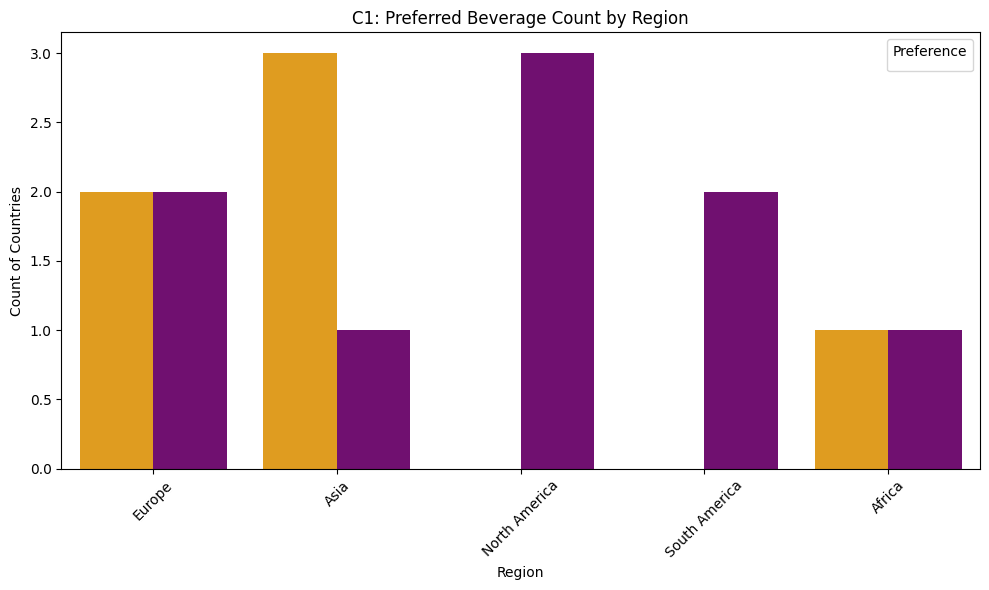

In [6]:
custom_colors = ['orange','purple']
plt.figure(figsize=(10,6))
sns.countplot(x='Region', hue='Preferred Beverage', data=df,
order=df['Region'].value_counts().index,
legend=False,
palette=(custom_colors))
plt.title('C1: Preferred Beverage Count by Region')
plt.xlabel('Region')
plt.ylabel('Count of Countries')
plt.legend(title='Preference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


